In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mtdlearn.mtd import MTD
from mtdlearn.preprocessing import PathEncoder
from mtdlearn.datasets import ChainGenerator

import warnings
warnings.filterwarnings("ignore")

## Generate data

In [2]:
cg = ChainGenerator(('A', 'B', 'C'), '>', 3, min_len=4, max_len=5)

In [3]:
x, y = cg.generate_data(1000)

## Encode paths

In [4]:
pe = PathEncoder(3)
pe.fit(x, y)

PathEncoder(order=3, r_just_string='null', sep='>')

In [5]:
pe.label_dict

{'A': 0, 'B': 1, 'C': 2, 'null': 3}

In [6]:
x_tr3, y_tr3 = pe.transform(x, y)

In [7]:
x_tr3[:5]

array([[2, 0, 2],
       [1, 1, 0],
       [0, 0, 2],
       [2, 1, 0],
       [0, 2, 2]])

In [8]:
y_tr3[:5]

array([1, 2, 2, 1, 2])

## Fitting model

In [9]:
model = MTD(n_dimensions=3, order=3)

In [10]:
model.fit(x_tr3, y_tr3)

log-likelihood value: -1051.4517263766825


## Information criteria

In [11]:
model.aic

2130.903452753365

In [12]:
model.bic

2199.6120266591147

## Trained parameters

In [13]:
model.lambdas.round(3)

array([0.337, 0.112, 0.551])

In [14]:
model.transition_matrices.round(3)

array([[[0.017, 0.531, 0.452],
        [0.184, 0.528, 0.288],
        [0.403, 0.597, 0.001]],

       [[0.447, 0.148, 0.405],
        [0.11 , 0.326, 0.564],
        [0.047, 0.017, 0.936]],

       [[0.542, 0.319, 0.139],
        [0.329, 0.314, 0.357],
        [0.294, 0.426, 0.28 ]]])

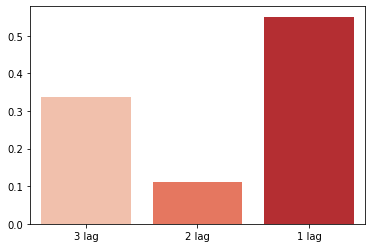

In [15]:
sns.barplot(x=[f'{abs(i-3)} lag' for i in range(model.order)], y=model.lambdas, palette='Reds');

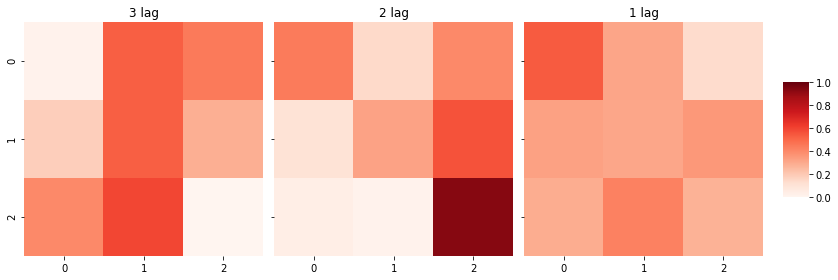

In [16]:
fig, axn = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 4))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    sns.heatmap(model.transition_matrices[i], ax=ax,
                cbar=i == 0,
                vmin=0, vmax=1,
                cmap='Reds',
                cbar_ax=None if i else cbar_ax)
    ax.set_title(f'{3-i} lag')

fig.tight_layout(rect=[0, 0, .9, 1]);

## Predict

In [17]:
model.predict(pe.transform(np.array([['A>B>C'], ['B>B>A'], ['C>C>C']])))

array([1, 1, 1])

In [18]:
model.predict_proba(pe.transform(np.array([['A>B>C'], ['B>B>A'], ['C>C>C']])))

array([[0.17991254, 0.45025787, 0.36982959],
       [0.37293428, 0.39034503, 0.23672069],
       [0.30299801, 0.43797017, 0.25903182]])